In [52]:
import numpy as np
import pandas as pd
from dateutil import parser
from FLiES_sensitivity import process_FLiES_table
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import r2_score, mean_squared_error

In [2]:
inputs_df = pd.read_csv("inputs.csv")
inputs_df

,tower,lat,lon,orbit,scene,tile,date_UTC,doy,time_solar,AOT,...,Topt,fAPARmax,LE_insitu,H_insitu,Rn_insitu,G_insitu,SWin_insitu,SWout_insitu,LWin_insitu,LWout_insitu
0,US-Ha2,42.5393,-72.1779,9254,9,18TYN,2020-02-22,53,2020-02-21 19:11:17.304,0.088195,...,0.0,0.5545,23.770000,NaN,NaN,NaN,-1.680,0.758,266.0,307.0
1,US-Ha2,42.5393,-72.1779,10150,9,18TYN,2020-04-20,111,2020-04-19 19:11:17.304,0.237342,...,0.0,0.5545,37.980000,100.200000,128.80,NaN,-4.610,2.300,257.0,354.0
2,US-Ha2,42.5393,-72.1779,10352,9,18TYN,2020-05-03,124,2020-05-02 19:11:17.304,0.107484,...,0.0,0.5545,68.060000,152.300000,261.30,NaN,-4.050,0.952,316.0,419.0
3,US-Ha2,42.5393,-72.1779,10684,7,18TYN,2020-05-24,145,2020-05-23 19:11:17.304,0.094339,...,0.0,0.5545,NaN,NaN,NaN,NaN,-0.525,0.463,381.0,425.0
4,US-Ha2,42.5393,-72.1779,11069,8,18TYN,2020-06-18,170,2020-06-17 19:11:17.304,0.050474,...,0.0,0.5545,122.200000,292.500000,657.60,NaN,10.000,2.320,310.0,408.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
131,US-xUK,39.0404,-95.1921,10994,7,15SUD,2020-06-13,165,2020-06-12 17:39:13.896,0.107889,...,5.8,0.4664,NaN,NaN,368.81,17.024,347.290,67.140,411.0,488.9
132,US-xUK,39.0404,-95.1921,11909,6,15SUD,2020-08-11,224,2020-08-10 17:39:13.896,0.143261,...,5.8,0.4664,131.783751,6.519267,279.97,14.633,347.330,59.370,363.0,440.6
133,US-xUK,39.0404,-95.1921,16668,8,15SUD,2021-06-14,165,2021-06-13 17:39:13.896,0.121046,...,5.8,0.4664,NaN,NaN,NaN,NaN,347.290,67.140,411.0,488.9
134,US-xUK,39.0404,-95.1921,16810,8,15SUD,2021-06-23,174,2021-06-22 17:39:13.896,0.109902,...,5.8,0.4664,237.726708,187.862743,764.71,16.236,385.650,67.010,387.0,466.6


In [3]:
inputs_df.date_UTC = inputs_df.date_UTC.apply(lambda d: parser.parse(d).strftime("%Y-%m-%d"))
inputs_df.date_UTC

0      2020-02-22
1      2020-04-20
2      2020-05-03
3      2020-05-24
4      2020-06-18
          ...    
131    2020-06-13
132    2020-08-11
133    2021-06-14
134    2021-06-23
135    2020-09-04
Name: date_UTC, Length: 136, dtype: object

In [4]:
outputs_df = process_FLiES_table(inputs_df)
outputs_df.to_csv("FLiES_outputs.csv")
outputs_df

5/5 [==============================] - 0s 657us/step


2024-01-20 15:47:56.074656: W tensorflow/tsl/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz


,tower,lat,lon,orbit,scene,tile,date_UTC,doy,time_solar,AOT,...,SWout_insitu,LWin_insitu,LWout_insitu,tm,puv,pvis,pnir,fduv,fdvis,fdnir
0,US-Ha2,42.5393,-72.1779,9254,9,18TYN,2020-02-22,53,2020-02-21 19:11:17.304,0.088195,...,0.758,266.0,307.0,0.186580,0.084155,0.401986,0.520812,1.000000,0.915000,1.000000
1,US-Ha2,42.5393,-72.1779,10150,9,18TYN,2020-04-20,111,2020-04-19 19:11:17.304,0.237342,...,2.300,257.0,354.0,0.144991,0.079207,0.436194,0.484957,0.998837,0.563953,0.998985
2,US-Ha2,42.5393,-72.1779,10352,9,18TYN,2020-05-03,124,2020-05-02 19:11:17.304,0.107484,...,0.952,316.0,419.0,0.159102,0.085993,0.507596,0.406085,0.998608,0.544726,0.998543
3,US-Ha2,42.5393,-72.1779,10684,7,18TYN,2020-05-24,145,2020-05-23 19:11:17.304,0.094339,...,0.463,381.0,425.0,0.231055,0.073091,0.489086,0.436647,0.999875,0.914921,0.994260
4,US-Ha2,42.5393,-72.1779,11069,8,18TYN,2020-06-18,170,2020-06-17 19:11:17.304,0.050474,...,2.320,310.0,408.0,0.246633,0.070791,0.477461,0.450242,0.993148,0.793107,0.985945
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
131,US-xUK,39.0404,-95.1921,10994,7,15SUD,2020-06-13,165,2020-06-12 17:39:13.896,0.107889,...,67.140,411.0,488.9,0.156713,0.078190,0.510574,0.410107,0.999319,0.914064,0.999699
132,US-xUK,39.0404,-95.1921,11909,6,15SUD,2020-08-11,224,2020-08-10 17:39:13.896,0.143261,...,59.370,363.0,440.6,0.107012,0.083589,0.528847,0.385974,1.000000,0.827136,1.000000
133,US-xUK,39.0404,-95.1921,16668,8,15SUD,2021-06-14,165,2021-06-13 17:39:13.896,0.121046,...,67.140,411.0,488.9,0.697258,0.049077,0.447255,0.506799,0.624868,0.257856,0.107336
134,US-xUK,39.0404,-95.1921,16810,8,15SUD,2021-06-23,174,2021-06-22 17:39:13.896,0.109902,...,67.010,387.0,466.6,0.639694,0.055154,0.459524,0.483775,0.678178,0.323317,0.219154


In [5]:
outputs_df.Rg

0        0.000000
1        0.000000
2        0.000000
3        8.105838
4       19.590545
          ...    
131     63.251838
132     32.857885
133    281.425046
134    260.109986
135      5.973378
Name: Rg, Length: 136, dtype: float64

In [6]:
outputs_df.SWin_insitu

0       -1.680
1       -4.610
2       -4.050
3       -0.525
4       10.000
        ...   
131    347.290
132    347.330
133    347.290
134    385.650
135     21.800
Name: SWin_insitu, Length: 136, dtype: float64

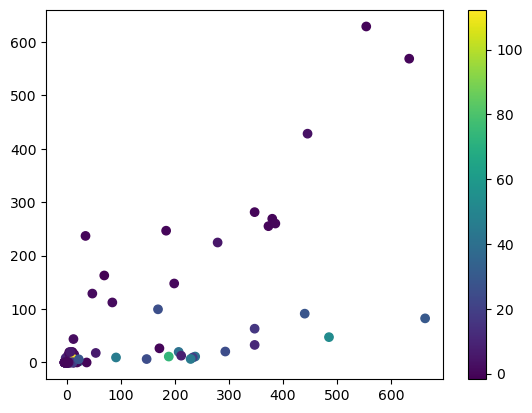

In [11]:
plot = plt.scatter(x=outputs_df.SWin_insitu, y=outputs_df.Rg, c=outputs_df.COT)
plt.colorbar(plot)

0.46 110.97


/var/folders/hk/35_x93nx79vg1zmd2fy1vcbr0000gq/T/ipykernel_33142/1267155780.py:22: UserWarning: 
The palette list has fewer values (6) than needed (128) and will cycle, which may produce an uninterpretable plot.
  sns.scatterplot(x=x_col, y=y_col, hue=color_col, palette=palette, data=df, ax=ax)


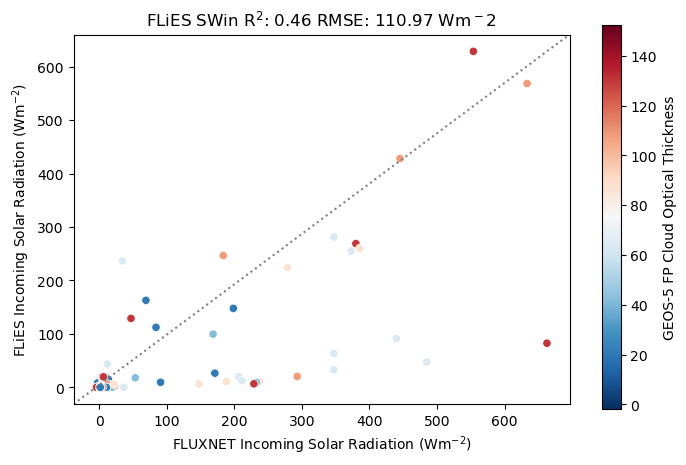

In [70]:
# Assuming 'df' is your DataFrame
df = outputs_df
x_col = 'SWin_insitu'
x_label = "FLUXNET Incoming Solar Radiation (Wm$^{-2}$)"
y_col = 'Rg'
y_label = "FLiES Incoming Solar Radiation (Wm$^{-2}$)"
color_col = 'COT'
color_label = "GEOS-5 FP Cloud Optical Thickness"

fig, ax = plt.subplots()
cax = fig.add_axes([0.95, 0.1, 0.03, 0.8])

cmap = "RdBu_r"
palette = sns.mpl_palette(cmap, 6)

norm = plt.Normalize(df[color_col].min(), df[color_col].max())
sm = plt.cm.ScalarMappable(cmap=cmap, norm=norm)
sm.set_array([])

ax.plot([0, 1], [0, 1], transform=ax.transAxes, color="gray", linestyle="dotted")

sns.scatterplot(x=x_col, y=y_col, hue=color_col, palette=palette, data=df, ax=ax)

# Remove the legend and add a colorbar
ax.get_legend().remove()
colorbar = fig.colorbar(sm, cax=cax)
colorbar.set_label(color_label)
ax.set(xlabel=x_label, ylabel=y_label)

df_clean = df[[x_col, y_col]].dropna()

r2 = round(r2_score(y_true=df_clean[x_col], y_pred=df_clean[y_col]), 2)
rmse = round(np.sqrt(mean_squared_error(y_true=df_clean[x_col], y_pred=df_clean[y_col])), 2)
print(r2, rmse)

ax.set_title(f"FLiES SWin R$^{2}$: {r2} RMSE: {rmse} Wm$^{-2}$")

plt.show()


In [ ]:
inputs_df.SZA

In [15]:
clear_sky = outputs_df[outputs_df.COT < 10]
clear_sky

,tower,lat,lon,orbit,scene,tile,date_UTC,doy,time_solar,AOT,...,SWout_insitu,LWin_insitu,LWout_insitu,tm,puv,pvis,pnir,fduv,fdvis,fdnir
0,US-Ha2,42.5393,-72.1779,9254,9,18TYN,2020-02-22,53,2020-02-21 19:11:17.304,0.088195,...,0.758,266.0,307.0,0.186580,0.084155,0.401986,0.520812,1.000000,0.915000,1.000000
1,US-Ha2,42.5393,-72.1779,10150,9,18TYN,2020-04-20,111,2020-04-19 19:11:17.304,0.237342,...,2.300,257.0,354.0,0.144991,0.079207,0.436194,0.484957,0.998837,0.563953,0.998985
2,US-Ha2,42.5393,-72.1779,10352,9,18TYN,2020-05-03,124,2020-05-02 19:11:17.304,0.107484,...,0.952,316.0,419.0,0.159102,0.085993,0.507596,0.406085,0.998608,0.544726,0.998543
3,US-Ha2,42.5393,-72.1779,10684,7,18TYN,2020-05-24,145,2020-05-23 19:11:17.304,0.094339,...,0.463,381.0,425.0,0.231055,0.073091,0.489086,0.436647,0.999875,0.914921,0.994260
4,US-Ha2,42.5393,-72.1779,11069,8,18TYN,2020-06-18,170,2020-06-17 19:11:17.304,0.050474,...,2.320,310.0,408.0,0.246633,0.070791,0.477461,0.450242,0.993148,0.793107,0.985945
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
128,US-xUK,39.0404,-95.1921,7516,7,15SUD,2019-11-02,306,2019-11-01 17:39:13.896,0.104228,...,-1.320,364.6,362.4,0.196573,0.076799,0.477566,0.446903,0.999266,0.451024,0.999090
129,US-xUK,39.0404,-95.1921,7985,4,15SUD,2019-12-02,336,2019-12-01 17:39:13.896,0.108163,...,0.210,287.1,369.0,0.153427,0.088370,0.468516,0.443418,0.999468,0.509585,0.999394
130,US-xUK,39.0404,-95.1921,8325,8,15SUD,2019-12-24,358,2019-12-23 17:39:13.896,0.050231,...,1.090,192.3,281.6,0.228539,0.074819,0.466399,0.460916,1.000000,0.511323,1.000000
133,US-xUK,39.0404,-95.1921,16668,8,15SUD,2021-06-14,165,2021-06-13 17:39:13.896,0.121046,...,67.140,411.0,488.9,0.697258,0.049077,0.447255,0.506799,0.624868,0.257856,0.107336


0.87 50.26


/var/folders/hk/35_x93nx79vg1zmd2fy1vcbr0000gq/T/ipykernel_33142/1527478776.py:19: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.scatterplot(x=x_col, y=y_col, palette=palette, data=df, ax=ax)


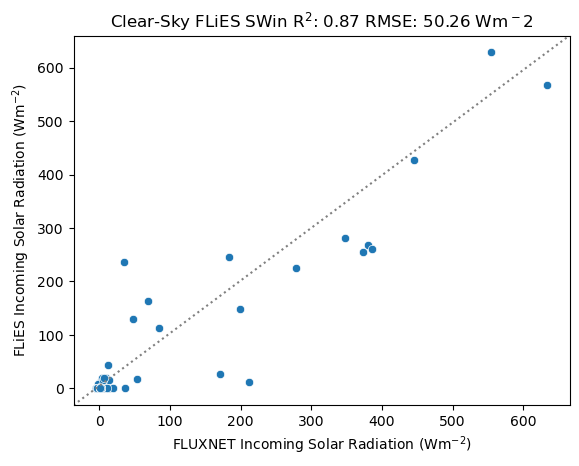

In [69]:
# Assuming 'df' is your DataFrame
df = clear_sky
x_col = 'SWin_insitu'
x_label = "FLUXNET Incoming Solar Radiation (Wm$^{-2}$)"
y_col = 'Rg'
y_label = "FLiES Incoming Solar Radiation (Wm$^{-2}$)"

fig, ax = plt.subplots()

cmap = "RdBu_r"
palette = sns.mpl_palette(cmap, 6)

norm = plt.Normalize(df[color_col].min(), df[color_col].max())
sm = plt.cm.ScalarMappable(cmap=cmap, norm=norm)
sm.set_array([])

ax.plot([0, 1], [0, 1], transform=ax.transAxes, color="gray", linestyle="dotted")

sns.scatterplot(x=x_col, y=y_col, palette=palette, data=df, ax=ax)
ax.set(xlabel=x_label, ylabel=y_label)

df_clean = df[[x_col, y_col]].dropna()

r2 = round(r2_score(y_true=df_clean[x_col], y_pred=df_clean[y_col]), 2)
rmse = round(np.sqrt(mean_squared_error(y_true=df_clean[x_col], y_pred=df_clean[y_col])), 2)
print(r2, rmse)

ax.set_title(f"Clear-Sky FLiES SWin R$^{2}$: {r2} RMSE: {rmse} Wm$^{-2}$")

plt.show()


In [18]:
zero_cloud_inputs = inputs_df.copy()
zero_cloud_inputs.COT = 0
zero_cloud_inputs

,tower,lat,lon,orbit,scene,tile,date_UTC,doy,time_solar,AOT,...,Topt,fAPARmax,LE_insitu,H_insitu,Rn_insitu,G_insitu,SWin_insitu,SWout_insitu,LWin_insitu,LWout_insitu
0,US-Ha2,42.5393,-72.1779,9254,9,18TYN,2020-02-22,53,2020-02-21 19:11:17.304,0.088195,...,0.0,0.5545,23.770000,NaN,NaN,NaN,-1.680,0.758,266.0,307.0
1,US-Ha2,42.5393,-72.1779,10150,9,18TYN,2020-04-20,111,2020-04-19 19:11:17.304,0.237342,...,0.0,0.5545,37.980000,100.200000,128.80,NaN,-4.610,2.300,257.0,354.0
2,US-Ha2,42.5393,-72.1779,10352,9,18TYN,2020-05-03,124,2020-05-02 19:11:17.304,0.107484,...,0.0,0.5545,68.060000,152.300000,261.30,NaN,-4.050,0.952,316.0,419.0
3,US-Ha2,42.5393,-72.1779,10684,7,18TYN,2020-05-24,145,2020-05-23 19:11:17.304,0.094339,...,0.0,0.5545,NaN,NaN,NaN,NaN,-0.525,0.463,381.0,425.0
4,US-Ha2,42.5393,-72.1779,11069,8,18TYN,2020-06-18,170,2020-06-17 19:11:17.304,0.050474,...,0.0,0.5545,122.200000,292.500000,657.60,NaN,10.000,2.320,310.0,408.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
131,US-xUK,39.0404,-95.1921,10994,7,15SUD,2020-06-13,165,2020-06-12 17:39:13.896,0.107889,...,5.8,0.4664,NaN,NaN,368.81,17.024,347.290,67.140,411.0,488.9
132,US-xUK,39.0404,-95.1921,11909,6,15SUD,2020-08-11,224,2020-08-10 17:39:13.896,0.143261,...,5.8,0.4664,131.783751,6.519267,279.97,14.633,347.330,59.370,363.0,440.6
133,US-xUK,39.0404,-95.1921,16668,8,15SUD,2021-06-14,165,2021-06-13 17:39:13.896,0.121046,...,5.8,0.4664,NaN,NaN,NaN,NaN,347.290,67.140,411.0,488.9
134,US-xUK,39.0404,-95.1921,16810,8,15SUD,2021-06-23,174,2021-06-22 17:39:13.896,0.109902,...,5.8,0.4664,237.726708,187.862743,764.71,16.236,385.650,67.010,387.0,466.6


In [19]:
zero_cloud_inputs.COT

0      0
1      0
2      0
3      0
4      0
      ..
131    0
132    0
133    0
134    0
135    0
Name: COT, Length: 136, dtype: int64

In [20]:
zero_cloud_outputs = process_FLiES_table(zero_cloud_inputs)
zero_cloud_outputs

5/5 [==============================] - 0s 837us/step


,tower,lat,lon,orbit,scene,tile,date_UTC,doy,time_solar,AOT,...,SWout_insitu,LWin_insitu,LWout_insitu,tm,puv,pvis,pnir,fduv,fdvis,fdnir
0,US-Ha2,42.5393,-72.1779,9254,9,18TYN,2020-02-22,53,2020-02-21 19:11:17.304,0.088195,...,0.758,266.0,307.0,0.186580,0.084155,0.401986,0.520812,1.000000,0.915000,1.000000
1,US-Ha2,42.5393,-72.1779,10150,9,18TYN,2020-04-20,111,2020-04-19 19:11:17.304,0.237342,...,2.300,257.0,354.0,0.202819,0.070814,0.426103,0.505114,1.000000,0.915000,1.000000
2,US-Ha2,42.5393,-72.1779,10352,9,18TYN,2020-05-03,124,2020-05-02 19:11:17.304,0.107484,...,0.952,316.0,419.0,0.237602,0.070319,0.435893,0.493862,1.000000,0.915000,0.724078
3,US-Ha2,42.5393,-72.1779,10684,7,18TYN,2020-05-24,145,2020-05-23 19:11:17.304,0.094339,...,0.463,381.0,425.0,0.265640,0.064832,0.441715,0.491365,1.000000,0.875586,0.410589
4,US-Ha2,42.5393,-72.1779,11069,8,18TYN,2020-06-18,170,2020-06-17 19:11:17.304,0.050474,...,2.320,310.0,408.0,0.282826,0.060564,0.424683,0.512821,1.000000,0.876696,0.380398
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
131,US-xUK,39.0404,-95.1921,10994,7,15SUD,2020-06-13,165,2020-06-12 17:39:13.896,0.107889,...,67.140,411.0,488.9,0.689435,0.051386,0.461461,0.490073,0.618275,0.244583,0.098961
132,US-xUK,39.0404,-95.1921,11909,6,15SUD,2020-08-11,224,2020-08-10 17:39:13.896,0.143261,...,59.370,363.0,440.6,0.450373,0.061475,0.480511,0.453343,0.777721,0.438144,0.213846
133,US-xUK,39.0404,-95.1921,16668,8,15SUD,2021-06-14,165,2021-06-13 17:39:13.896,0.121046,...,67.140,411.0,488.9,0.697258,0.049077,0.447255,0.506799,0.624868,0.257856,0.107336
134,US-xUK,39.0404,-95.1921,16810,8,15SUD,2021-06-23,174,2021-06-22 17:39:13.896,0.109902,...,67.010,387.0,466.6,0.690354,0.050979,0.459087,0.492856,0.617164,0.245424,0.099671


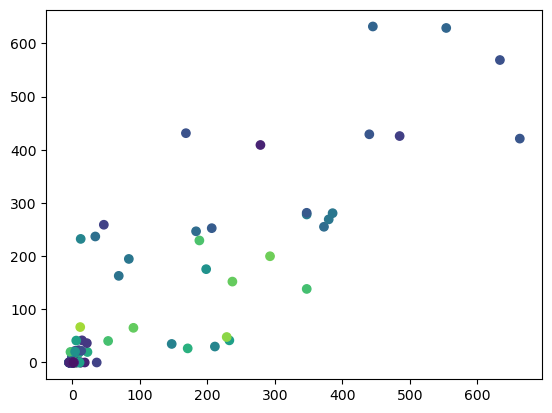

In [24]:
plt.scatter(x=zero_cloud_outputs.SWin_insitu, y=zero_cloud_outputs.Rg, c=zero_cloud_outputs.vapor_gccm)

0.76 74.78


/var/folders/hk/35_x93nx79vg1zmd2fy1vcbr0000gq/T/ipykernel_33142/4259281797.py:19: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.scatterplot(x=x_col, y=y_col, palette=palette, data=df, ax=ax)


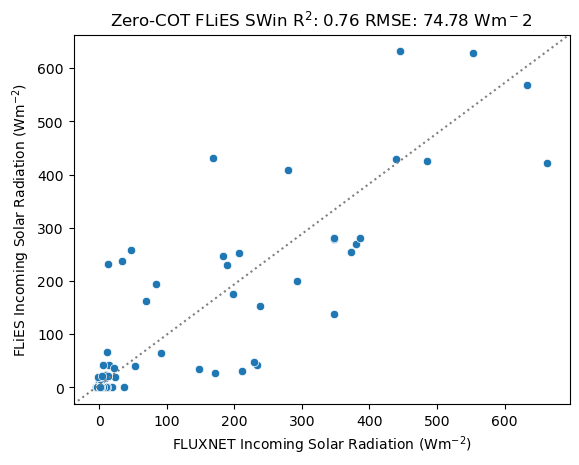

In [68]:
# Assuming 'df' is your DataFrame
df = zero_cloud_outputs
x_col = 'SWin_insitu'
x_label = "FLUXNET Incoming Solar Radiation (Wm$^{-2}$)"
y_col = 'Rg'
y_label = "FLiES Incoming Solar Radiation (Wm$^{-2}$)"

fig, ax = plt.subplots()

cmap = "RdBu_r"
palette = sns.mpl_palette(cmap, 6)

norm = plt.Normalize(df[color_col].min(), df[color_col].max())
sm = plt.cm.ScalarMappable(cmap=cmap, norm=norm)
sm.set_array([])

ax.plot([0, 1], [0, 1], transform=ax.transAxes, color="gray", linestyle="dotted")

sns.scatterplot(x=x_col, y=y_col, palette=palette, data=df, ax=ax)
ax.set(xlabel=x_label, ylabel=y_label)

df_clean = df[[x_col, y_col]].dropna()

r2 = round(r2_score(y_true=df_clean[x_col], y_pred=df_clean[y_col]), 2)
rmse = round(np.sqrt(mean_squared_error(y_true=df_clean[x_col], y_pred=df_clean[y_col])), 2)
print(r2, rmse)

ax.set_title(f"Zero-COT FLiES SWin R$^{2}$: {r2} RMSE: {rmse} Wm$^{-2}$")

plt.show()
